In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df['Churn']=df['Churn'].map({'Yes':1,'No':0})

In [10]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [11]:
df=df.drop('customerID',axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [15]:
num_columns=df.select_dtypes(include=['int64','float64']).columns.tolist()
num_columns.remove('Churn')

cat_columns=df.select_dtypes(include=['object']).columns.tolist()

num_columns,cat_columns

(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'],
 ['gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod'])

In [16]:
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
0,0.73463
1,0.26537


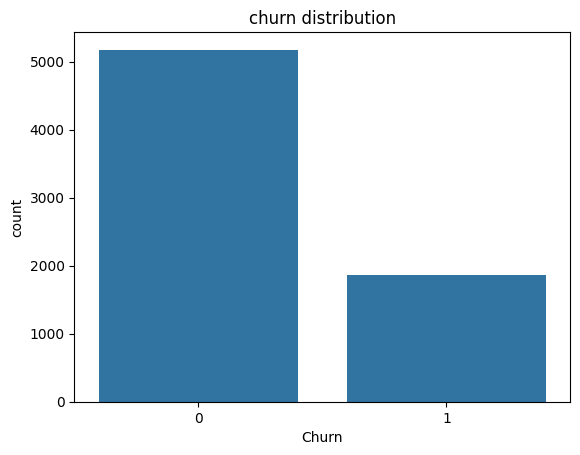

In [19]:
sns.countplot(x='Churn',data=df)
plt.title('churn distribution')
plt.show()

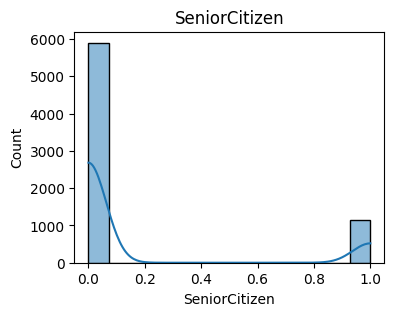

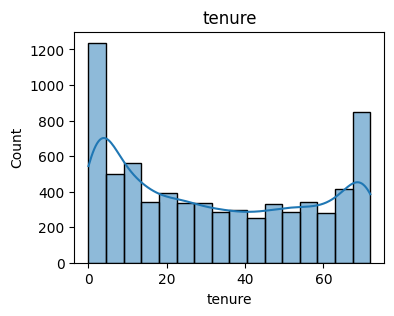

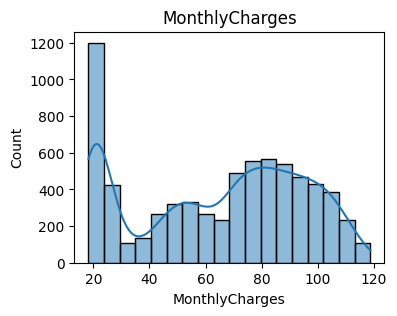

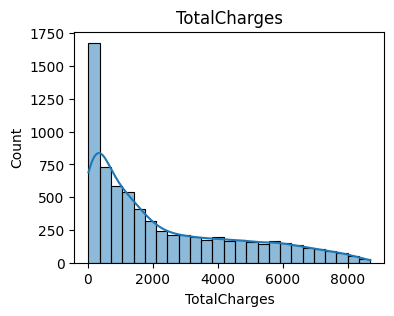

In [20]:
for col in num_columns:
    plt.figure(figsize=(4,3))
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()


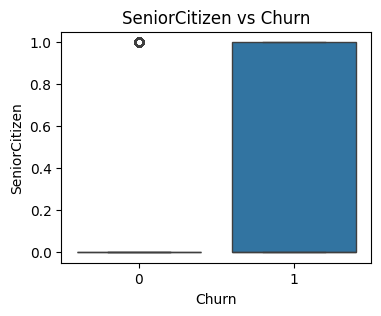

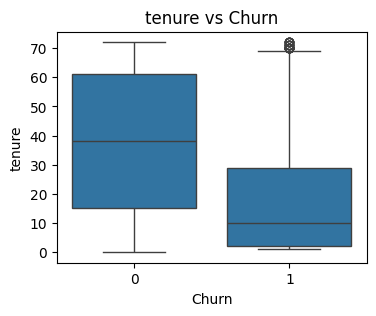

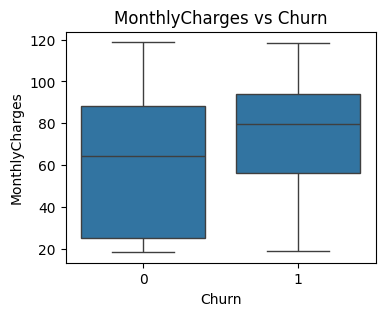

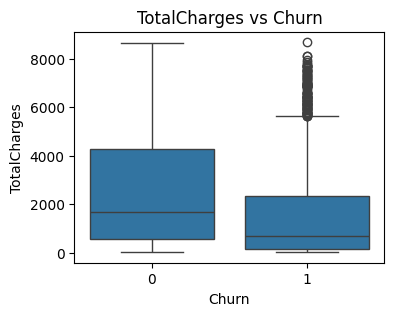

In [21]:
for col in num_columns:
    plt.figure(figsize=(4,3))
    sns.boxplot(x="Churn", y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.show()


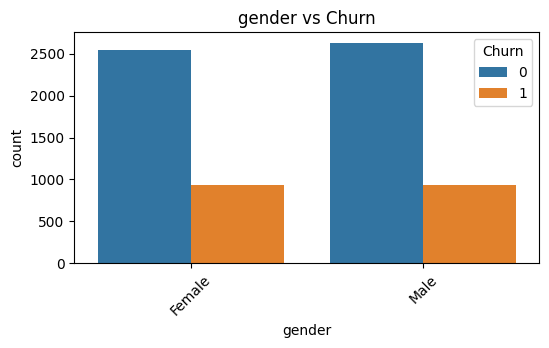

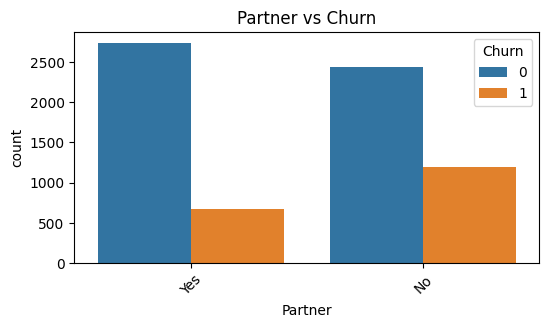

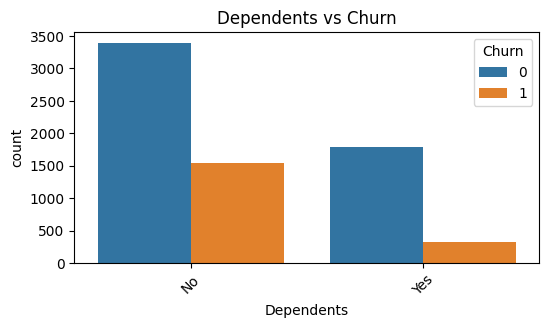

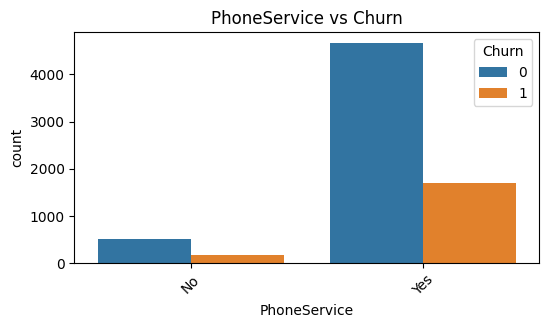

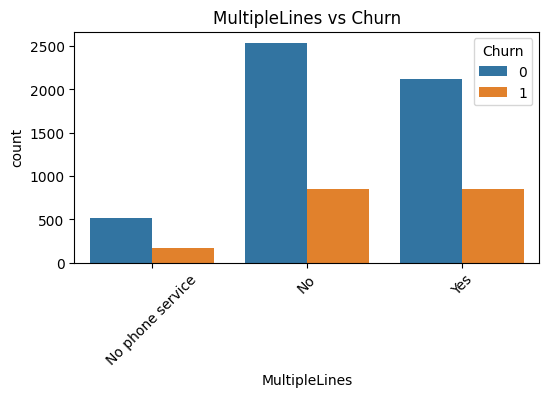

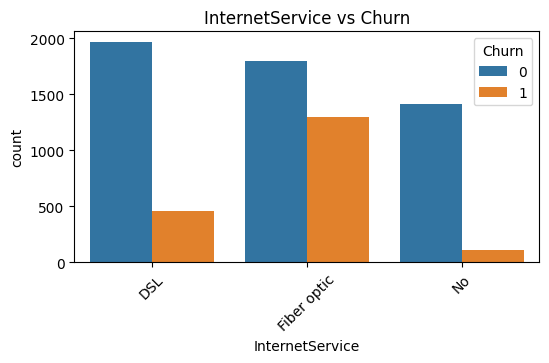

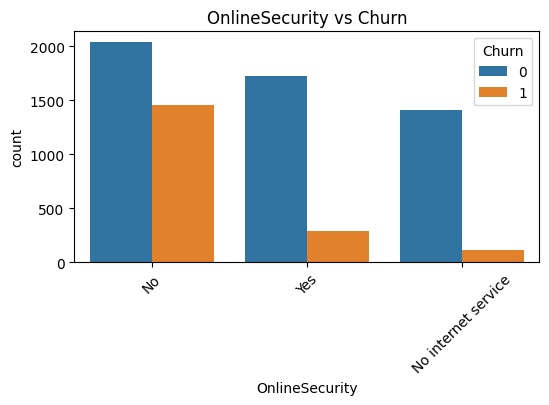

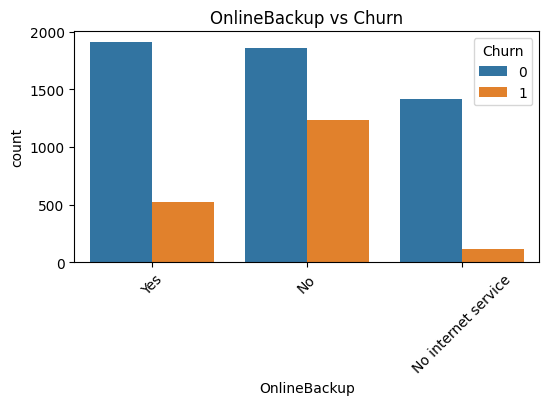

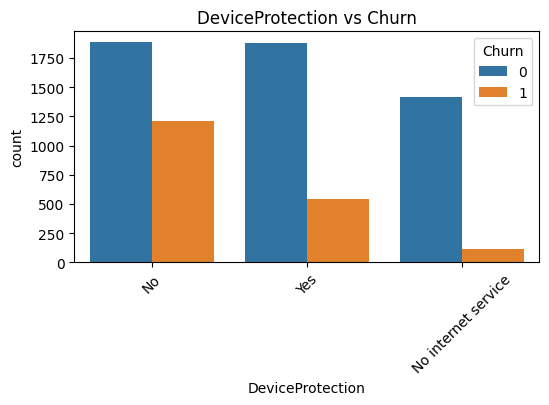

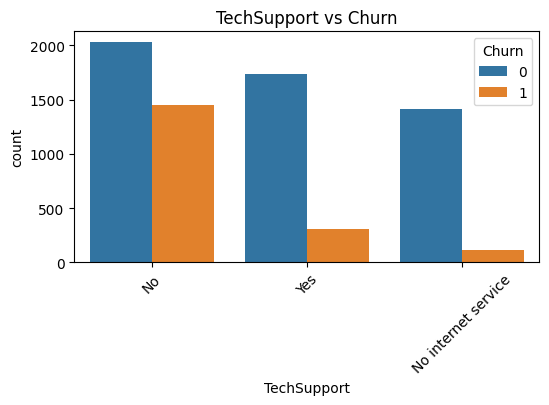

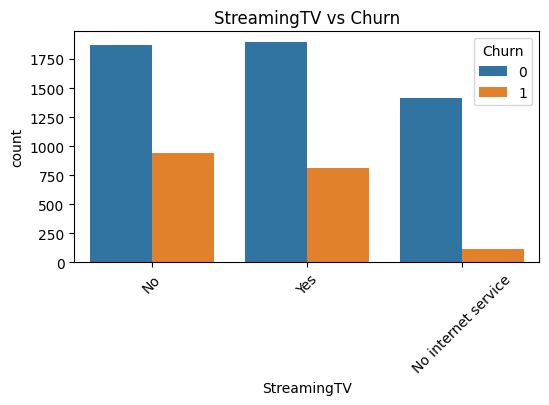

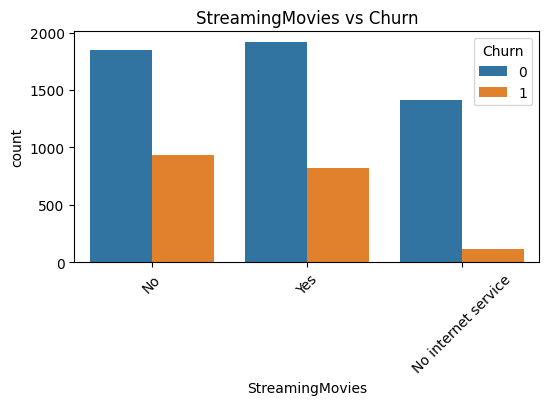

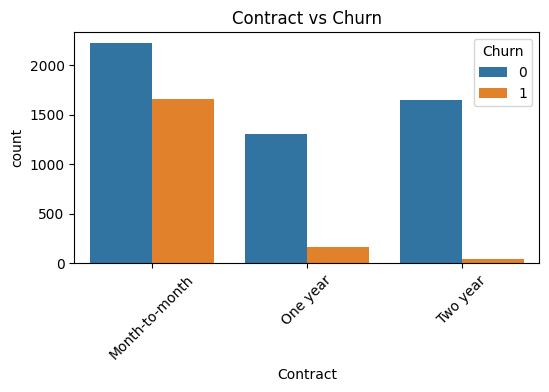

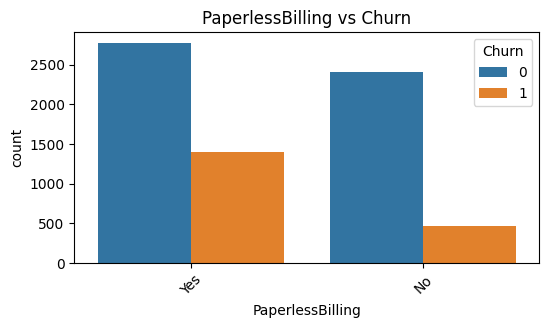

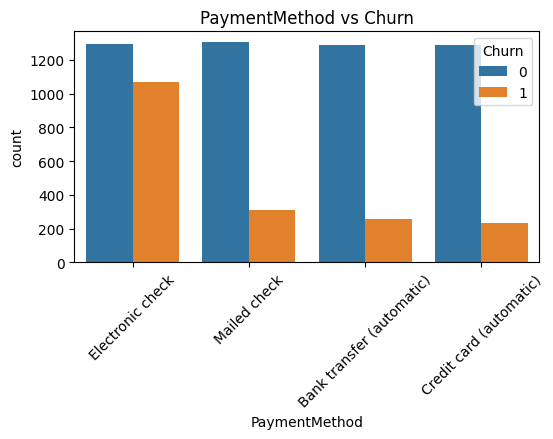

In [22]:
for col in cat_columns:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, hue="Churn", data=df)
    plt.xticks(rotation=45)
    plt.title(f"{col} vs Churn")
    plt.show()


In [23]:
df["AvgMonthlySpend"] = df["TotalCharges"] / df["tenure"]
df["AvgMonthlySpend"] = df["AvgMonthlySpend"].replace([np.inf, -np.inf], 0)


In [24]:
df["IsSenior"] = (df["SeniorCitizen"] == 1).astype(int)


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

In [40]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [41]:
num_features = X_train.select_dtypes(include=["int64","float64"]).columns
cat_features = X_train.select_dtypes(include=["object"]).columns


In [42]:
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])


In [43]:
cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])


In [44]:
preprocessor = ColumnTransformer(transformers=[
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])


In [45]:
baseline_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])

baseline_model.fit(X_train, y_train)

y_pred_base = baseline_model.predict(X_test)
y_prob_base = baseline_model.predict_proba(X_test)[:,1]

print("BASELINE MODEL")
print(classification_report(y_test, y_pred_base))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_base))


BASELINE MODEL
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

ROC-AUC: 0.8420625694282984


In [46]:
smote_lr = ImbPipeline(steps=[
    ("preprocess", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("model", LogisticRegression(max_iter=1000))
])

smote_lr.fit(X_train, y_train)

y_pred_smote = smote_lr.predict(X_test)
y_prob_smote = smote_lr.predict_proba(X_test)[:,1]

print("LOGISTIC REGRESSION + SMOTE")
print(classification_report(y_test, y_pred_smote))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_smote))


LOGISTIC REGRESSION + SMOTE
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.51      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409

ROC-AUC: 0.8401741197137615


In [47]:
smote_rf = ImbPipeline(steps=[
    ("preprocess", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("model", RandomForestClassifier(
        n_estimators=300,
        max_depth=12,
        random_state=42
    ))
])

smote_rf.fit(X_train, y_train)

y_pred_rf = smote_rf.predict(X_test)
y_prob_rf = smote_rf.predict_proba(X_test)[:,1]

print("RANDOM FOREST + SMOTE")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


RANDOM FOREST + SMOTE
              precision    recall  f1-score   support

           0       0.87      0.80      0.84      1035
           1       0.55      0.67      0.61       374

    accuracy                           0.77      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.77      0.77      1409

ROC-AUC: 0.8379369138959932


In [48]:
results = pd.DataFrame({
    "Model": [
        "Logistic Regression (Baseline)",
        "Logistic Regression + SMOTE",
        "Random Forest + SMOTE"
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, y_prob_base),
        roc_auc_score(y_test, y_prob_smote),
        roc_auc_score(y_test, y_prob_rf)
    ]
})

results.sort_values("ROC-AUC", ascending=False)


,Model,ROC-AUC
0,Logistic Regression (Baseline),0.842063
1,Logistic Regression + SMOTE,0.840174
2,Random Forest + SMOTE,0.837937


In [49]:
import joblib
joblib.dump(smote_rf, "churn_model_pipeline.pkl")


['churn_model_pipeline.pkl']